# UNSUPERVISED LEARNING


**CONTENTS**

- [K-means Clustering](#k_mean_clustering)
- [Mini-Batch K-Means](#mini_batch_k_means)
- [Affinity Propagation](#affinity)
- [Hierarchical/Agglomerative Clustering](#hier)
- [DBScan](#dbscan)

<a id='k_mean_clustering'></a>
## 1. K-MEANS CLUSTERING

- Good reference: http://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- Try to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. 
- Require the number of clusters to be specified. 
- Scale well to large number of samples and has been used across a large range of application areas in many different fields.
- Work best in datasets that have with clusters that are roughly equally-sized and shaped roughly regularly.

- **Limitation:**
    + The output for any fixed training set is not the same: K-means is considered a hill climbing algorithm, and the result is very dependent on the cluster center initialization (initialization of the centroids). k-means is guaranteed to converge, the final cluster configuration to which it converges is not in general unique, and depends on the initial centroid locations.
    + Could have bad local minimum for the cluster.
- It is actually possible for no data points to be assigned to a cluster in the Reassign Points step. Example: When initializing the centroids, place one centroid inside a ring of other centroids in some empty region => the ring of centroids will "block off" the inner centroid from the data points.

### Important parameters in k-means clustering

##### n_clusters: 
- default: n_clusters = 8

##### max_iter: 
- default: max_iter = 300

##### n_init: 
- default: n_init = 10
- Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

### 1.1. CLUSTERING - CASE STUDY 1

**DESCRIPTION:**
- Input file:  a binary MATLAB .mat file `'data/k_means_example.mat'`. 

- This MATLAB .mat file can be read using the `scipy.io` package.

**LOAD THE DATA**

In [144]:
### import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
# read matlab file
import scipy.io

In [145]:
mat = scipy.io.loadmat('data/k_means_example.mat')

In [146]:
mat['X']

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

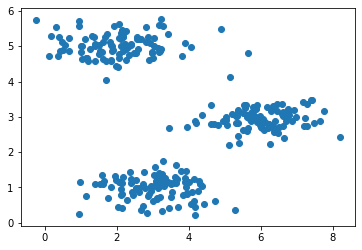

In [176]:
plt.scatter(mat['X'][:,0], mat['X'][:,1])
plt.show()

In [186]:
kmeans = KMeans (n_clusters = 3, random_state = 0).fit(mat['X'])
pred = kmeans.predict(mat['X'])

In [187]:
print(len(pred))
pred

300


array([2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], d

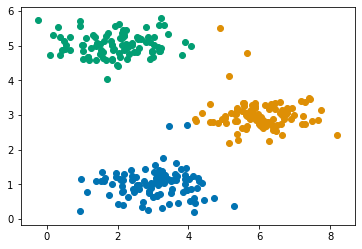

In [188]:
### Draw the clustering result
import seaborn as sns
### Good qualitative palette, 10 different colors in each palette
#list_palettes = ['deep', 'pastel', 'dark', 'colorblind', 'cubehelix']

def plotCluster(pred, mat):
    colors = sns.color_palette('colorblind',10)
    for i, val in enumerate(pred):
        plt.scatter(mat['X'][i][0], mat['X'][i][1], color = colors[val])
plotCluster(pred, mat)

### 1.2. CLUSTERING - CASE STUDY 2: CLUSTERING ON PIXELS
### IMAGE COMPRESSION 

**DESCRIPTION:**
- Use K-Means to compress an image. 
- To do this, first run K-Means on the colors of the pixels in the image and then map each pixel onto its closest centroid.
- Input file:  a binary MATLAB .mat file `'bird_small.png'`. 

- This MATLAB .mat file can be read using the `scipy.io` package.

In [26]:
!pip install --upgrade pip
!pip install --upgrade Pillow
from PIL import Image

  Using cached Pillow-8.2.0-cp37-cp37m-macosx_10_10_x86_64.whl (2.8 MB)


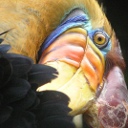

In [90]:
### Load image
im = Image.open('data/bird_small.png', 'r')
im

In [91]:
### Check the image properties
width, height = im.size
pixel_values = list(im.getdata())
print("Width and height of the image: width: {}, height: {}".format(width, height))
print("Image mode: ", im.mode)
pixel_values[1:3]

Width and height of the image: width: 128, height: 128
Image mode:  RGB


[(230, 185, 116), (226, 186, 110)]

In [61]:
### Normalize the image so that all values in the range [0-1]
pixel_values = [[x/255 for x in val] for val in pixel_values]
### Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
pixel_values = np.reshape(np.array(pixel_values), (width * height, 3))
len(pixel_values)

16384

In [139]:
### Run the K-Means algorithm on the picture, set n_clusters = 32
n_clusters = 32
kmeans = KMeans (n_clusters = n_clusters, random_state = 0).fit(pixel_values)
pred = kmeans.predict(pixel_values)
pred

array([ 4, 24,  4, ...,  0,  0,  0], dtype=int32)

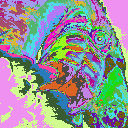

In [140]:
#### Convert pred back to the image, using only 32 centroid values.
# Reshape the recovered image into proper dimensions
im_recover = np.reshape(pred, (width, height))
centroid_vals = kmeans.cluster_centers_*255 # value of all the centroids
# assign all the pixels with its centroid valuse
new_im = []
for i in im_recover:
    new_im.append(centroid_vals[i])
# convert into np.array 
new_im = np.array(new_im)
# convert pixel value into the image
Image.fromarray((new_im).astype(np.uint8))

In [141]:
### save image
Image.fromarray((new_im).astype(np.uint8)).save("data/reduce_bird.png","PNG")

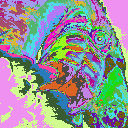

In [142]:
Image.open('data/reduce_bird.png', 'r')

<a id='mini_batch_k_means'></a>
## 2.  MINI-BATCH K-MEANS

- A modified-version of k-means
- Updates to the cluster centroids using mini-batches rather than the entire dataset
=> Faster, more robust to statistical noise.

### Important parameters 

##### n_clusters: 
- default: n_clusters = 8

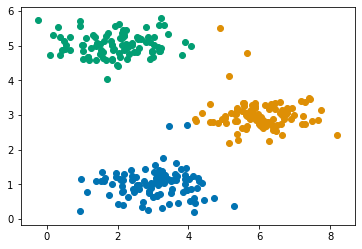

In [208]:
from sklearn.cluster import MiniBatchKMeans
kmeans = KMeans (n_clusters = 3, random_state = 0).fit(mat['X'])
plotCluster(kmeans.labels_, mat)

<a id='affinity'></a>
## 3.  AFFINITY PROPAGATION

- Makes clusters based on graph distances between points.

### Important parameters in Affinity Propagation

##### Damping: 
- Default = 0.5
- Range [0.5, 1]

#####  Sample preference (?)

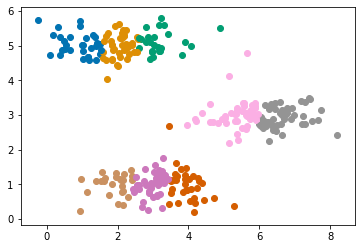

In [207]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(damping = .9).fit(mat['X'])
pred = clustering.predict(mat['X'])
plotCluster(pred, mat)

In [190]:
clustering.cluster_centers_

array([[1.85382737, 5.00752482],
       [0.54845223, 5.0267298 ],
       [3.04202069, 5.00758373],
       [4.08164951, 0.87200343],
       [3.08970176, 1.08814448],
       [1.84935524, 1.02232644],
       [4.61652442, 2.79320715],
       [5.89562099, 2.89843977],
       [6.99198434, 2.98706729]])

<a id='hier'></a>
## 4.  HIERARCHICAL CLUSTERING (AGGLOMERATIVE CLUSTERIN

- Make clusters based on graph distances between points.
- Work well on smaller globular clusters, uneven sizes.

### Important parameters in 

##### n_clusters: 
- default: n_clusters = 2


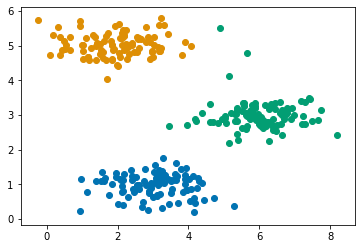

In [205]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3).fit(mat['X'])
plotCluster(clustering.labels_, mat)

<a id='dbscan'></a>
## 5.   DBSCAN
- Density-Based Spatial Clustering of Applications with Noise)
- Finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

### Important parameters in 

##### eps 

#####  min_samples

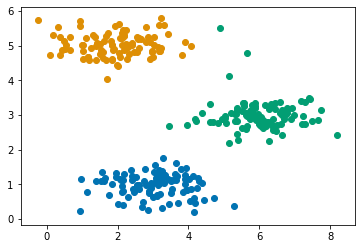

In [206]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.3, min_samples = 10).fit(mat['X'])
plotCluster(clustering.labels_, mat)